# **Business Case Danone**
#### --- Júlia Othats-Dalès Gibert

### **Librerías**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

### **Importación de datos**

In [2]:
# cargar excel sheets
df_sales = pd.read_excel('danone_case_dataset.xlsx', sheet_name="sales")
df_products = pd.read_excel('danone_case_dataset.xlsx', sheet_name="product")
df_stores = pd.read_excel('danone_case_dataset.xlsx', sheet_name="stores")

display(df_sales.head(), df_products.head(), df_stores.head())

,date_month,store_id,product_id,units_sold,price_per_unit,cost_per_unit
0,2024-01-01,101,1,244,2.22,1.26
1,2024-02-01,101,1,183,2.28,1.29
2,2024-03-01,101,1,187,2.30,1.31
3,2024-04-01,101,1,203,2.13,1.27
4,2024-05-01,101,1,229,2.15,1.29


,product_id,product_name,brand,category,pack_size
0,1,Activia Natural 4x125g,Activia,Yogurt,4x125g
1,2,Activia Frutas 4x125g,Activia,Yogurt,4x125g
2,3,Actimel Original 6x100g,Actimel,Yogurt,6x100g
3,4,Actimel Fresa 6x100g,Actimel,Yogurt,6x100g
4,5,Danonino Fresa 6x50g,Danonino,Yogurt,6x50g


,store_id,store_name,city,region,channel
0,101,Tienda BCN Centro,Barcelona,Cataluña,Supermercado
1,102,Tienda BCN Norte,Barcelona,Cataluña,Hipermercado
2,103,Tienda MAD Centro,Madrid,Madrid,Supermercado
3,104,Tienda MAD Sur,Madrid,Madrid,Online
4,105,Tienda VLC Centro,Valencia,Comunidad Valenciana,Supermercado


### **1. Exploración de datos y entendimiento**

#### 1.1. Estructura

In [3]:
df_sales.info()
df_products.info()
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_month      7560 non-null   datetime64[ns]
 1   store_id        7560 non-null   int64         
 2   product_id      7560 non-null   int64         
 3   units_sold      7560 non-null   int64         
 4   price_per_unit  7560 non-null   float64       
 5   cost_per_unit   7560 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 354.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    30 non-null     int64 
 1   product_name  30 non-null     object
 2   brand         30 non-null     object
 3   category      30 non-null     object
 4   pack_size     30 non-null     object
dtypes: int

#### 1.2. Calidad

In [4]:
# buscar duplicados y nulos
print(f"Sales:\t\tduplicates {df_sales.duplicated().sum()}, \tmissing {df_sales.isna().sum().sum()}")
print(f"Product:\tduplicates {df_products.duplicated().sum()}, \tmissing {df_products.isna().sum().sum()}")
print(f"Stores:\t\tduplicates {df_stores.duplicated().sum()}, \tmissing {df_stores.isna().sum().sum()}")

Sales:		duplicates 0, 	missing 0
Product:	duplicates 0, 	missing 0
Stores:		duplicates 0, 	missing 0


El dataset `sales` contiene 7560 filas y 6 columnas. No tiene valores nulos y todas las variables ya tienen el formato que les conviene. 

En `product` están los 30 tipos de producto con información como nombre, marca, categoría y tamaño. 

Similarmente, en `stores` encontramos información sobre 12 tiendas, especificando su ciudad, región y canal. 

In [34]:
bad_rows = df_sales[(df_sales['units_sold'] <= 0) | (df_sales['price_per_unit'] <= 0) | (df_sales['cost_per_unit'] < 0)]
print("Filas con valores inválidos:", len(bad_rows))

Filas con valores inválidos: 0


In [5]:
display(df_sales.describe())

# no hace falta ver para las dos tablas restantes porque no tienen variables numéricas

,date_month,store_id,product_id,units_sold,price_per_unit,cost_per_unit
count,7560,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000
mean,2024-10-31 05:42:51.428571392,106.500000,15.500000,168.863228,6.816267,3.647917
min,2024-01-01 00:00:00,101.000000,1.000000,22.000000,1.740000,1.110000
25%,2024-06-01 00:00:00,103.750000,8.000000,120.000000,2.130000,1.260000
50%,2024-11-01 00:00:00,106.500000,15.500000,174.000000,2.360000,1.330000
75%,2025-04-01 00:00:00,109.250000,23.000000,217.000000,3.280000,1.430000
max,2025-09-01 00:00:00,112.000000,30.000000,633.000000,30.890000,15.110000
std,NaN,3.452281,8.656014,94.007825,9.128771,4.742674


#### 1.3. Métricas

In [6]:
n_filas = len(df_sales)
n_productos = df_sales["product_id"].nunique()
n_tiendas = df_sales["store_id"].nunique()
meses = df_sales["date_month"].nunique()

n_filas, n_productos, n_tiendas, meses

(7560, 30, 12, 21)

### **2. Análisis base**

#### 2.1. Métricas derivadas

In [7]:
df_sales["revenue"] = df_sales["units_sold"] * df_sales["price_per_unit"]
df_sales["cost_total"] = df_sales["units_sold"] * df_sales["cost_per_unit"]
df_sales["margin_total"] = df_sales["revenue"] - df_sales["cost_total"]
df_sales["margin_pct"] = df_sales["margin_total"] / df_sales["revenue"]

display(df_sales.head())

,date_month,store_id,product_id,units_sold,price_per_unit,cost_per_unit,revenue,cost_total,margin_total,margin_pct
0,2024-01-01,101,1,244,2.22,1.26,541.68,307.44,234.24,0.432432
1,2024-02-01,101,1,183,2.28,1.29,417.24,236.07,181.17,0.434211
2,2024-03-01,101,1,187,2.30,1.31,430.10,244.97,185.13,0.430435
3,2024-04-01,101,1,203,2.13,1.27,432.39,257.81,174.58,0.403756
4,2024-05-01,101,1,229,2.15,1.29,492.35,295.41,196.94,0.400000


#### 2.2. Tabla resumen producto

In [35]:
df_prod_join = df_sales.merge(df_products, on="product_id", how='left')

df_prod_join.head()

,date_month,store_id,product_id,units_sold,price_per_unit,cost_per_unit,revenue,cost_total,margin_total,margin_pct,product_name,brand,category,pack_size
0,2024-01-01,101,1,244,2.22,1.26,541.68,307.44,234.24,0.432432,Activia Natural 4x125g,Activia,Yogurt,4x125g
1,2024-02-01,101,1,183,2.28,1.29,417.24,236.07,181.17,0.434211,Activia Natural 4x125g,Activia,Yogurt,4x125g
2,2024-03-01,101,1,187,2.30,1.31,430.10,244.97,185.13,0.430435,Activia Natural 4x125g,Activia,Yogurt,4x125g
3,2024-04-01,101,1,203,2.13,1.27,432.39,257.81,174.58,0.403756,Activia Natural 4x125g,Activia,Yogurt,4x125g
4,2024-05-01,101,1,229,2.15,1.29,492.35,295.41,196.94,0.400000,Activia Natural 4x125g,Activia,Yogurt,4x125g


In [79]:
summary_product = df_prod_join.groupby(["product_id", "product_name"]).agg(
    units_totales=("units_sold", "sum"),
    ingreso_total=("revenue", "sum"),
    margen_total=("margin_total", "sum")
).reset_index()
summary_product["margen_agregado_pct"] = summary_product["margen_total"] / summary_product["ingreso_total"]

summary_product.head()

,product_id,product_name,units_totales,ingreso_total,margen_total,margen_agregado_pct
0,1,Activia Natural 4x125g,51519,113643.39,47598.76,0.418843
1,2,Activia Frutas 4x125g,51895,114288.54,47417.13,0.414890
2,3,Actimel Original 6x100g,51976,113316.24,46185.80,0.407583
3,4,Actimel Fresa 6x100g,54721,119482.28,47382.88,0.396568
4,5,Danonino Fresa 6x50g,50001,110385.67,45200.38,0.409477


In [12]:
# top 5 productos por margen total
summary_product.sort_values(by="margen_total", ascending=False).head(5)

,product_id,product_name,units_totales,ingreso_total,margen_total,margen_medio_pct
24,25,Aptamil AR 800g,9434,270502.79,144293.35,0.533227
14,15,Aptamil 2 800g,9528,272801.14,135351.67,0.495568
13,14,Aptamil 1 800g,9659,276607.62,134797.76,0.486631
12,13,Evian 0.5L (6 pack),68890,231838.22,133389.86,0.574939
23,24,Evian 1L,64164,216572.95,127181.44,0.586694


#### 2.3. Tabla resumen categoría

In [80]:
summary_category = df_prod_join.groupby("category").agg(
    units_totales=("units_sold", "sum"),
    ingreso_total=("revenue", "sum"),
    margen_total=("margin_total", "sum")
).reset_index()
summary_category["margen_agregado_pct"] = summary_category["margen_total"] / summary_category["ingreso_total"]

summary_category.head()

,category,units_totales,ingreso_total,margen_total,margen_agregado_pct
0,Infant Nutrition,28621,819911.55,414442.78,0.505473
1,Medical Nutrition,23400,485542.01,205100.78,0.422416
2,Plant-based,204874,400596.96,160632.51,0.400983
3,Water,399115,1089164.04,534623.85,0.490857
4,Yogurt,620596,1455345.79,645935.40,0.443836


In [81]:
# top 5 categorías por margen total
summary_category.sort_values(by="margen_total", ascending=False).head(5)

,category,units_totales,ingreso_total,margen_total,margen_agregado_pct
4,Yogurt,620596,1455345.79,645935.40,0.443836
3,Water,399115,1089164.04,534623.85,0.490857
0,Infant Nutrition,28621,819911.55,414442.78,0.505473
1,Medical Nutrition,23400,485542.01,205100.78,0.422416
2,Plant-based,204874,400596.96,160632.51,0.400983


#### 2.4. ¿Qué marca y/o categoría tiene mayor margen medio?

Los productos de Nutrición Infantil muestran mayor eficiencia coste-beneficio.  

La marca con mayor margen medio es Evian. 

In [97]:
summary_category.sort_values(by="margen_agregado_pct", ascending=False).head(2)

,category,units_totales,ingreso_total,margen_total,margen_agregado_pct
0,Infant Nutrition,28621,819911.55,414442.78,0.505473
3,Water,399115,1089164.04,534623.85,0.490857


In [85]:
summary_brand = df_prod_join.groupby("brand").agg(
    units_totales=("units_sold", "sum"),
    ingreso_total=("revenue", "sum"),
    margen_total=("margin_total", "sum")
).reset_index()
summary_brand["margen_agregado_pct"] = summary_brand["margen_total"] / summary_brand["ingreso_total"]

summary_brand.sort_values(by="margen_agregado_pct", ascending=False).head(2)

,brand,units_totales,ingreso_total,margen_total,margen_agregado_pct
5,Evian,133054,448411.17,260571.30,0.581099
3,Aptamil,28621,819911.55,414442.78,0.505473


#### 2.5. ¿Qué productos se venden mucho pero con poco margen?

In [86]:
# identificamos productos con mucho volumen
high_volume = summary_product["units_totales"] > summary_product["units_totales"].quantile(0.75)

# mostramos los productos con más volumen pero menor margen
summary_product[high_volume].sort_values(by="margen_agregado_pct", ascending=True).head(5)

,product_id,product_name,units_totales,ingreso_total,margen_total,margen_agregado_pct
10,11,Font Vella 1.5L,65102,157107.50,61855.05,0.393712
3,4,Actimel Fresa 6x100g,54721,119482.28,47382.88,0.396568
26,27,Actimel Mix Cereales 6x100g,52503,114456.23,49304.54,0.430772
11,12,Lanjarón 1.5L,68261,164226.26,71013.48,0.432412
22,23,Font Vella Kids 0.33L (6 pack),66134,159227.79,69723.29,0.437884


In [87]:
low_margin = summary_product["margen_agregado_pct"] < summary_product["margen_agregado_pct"].quantile(0.25)

summary_product[low_margin].sort_values(by="units_totales", ascending=False).head(3)

,product_id,product_name,units_totales,ingreso_total,margen_total,margen_agregado_pct
10,11,Font Vella 1.5L,65102,157107.50,61855.05,0.393712
3,4,Actimel Fresa 6x100g,54721,119482.28,47382.88,0.396568
2,3,Actimel Original 6x100g,51976,113316.24,46185.80,0.407583


In [88]:
# o bien directamente
summary_product[high_volume & low_margin]

,product_id,product_name,units_totales,ingreso_total,margen_total,margen_agregado_pct
3,4,Actimel Fresa 6x100g,54721,119482.28,47382.88,0.396568
10,11,Font Vella 1.5L,65102,157107.50,61855.05,0.393712


### **3. Evolución temporal**

In [89]:
# agregación mensual de revenue y margin total
monthly = df_sales.groupby("date_month").agg(
    ingreso_total=("revenue", "sum"),
    margen_total=("margin_total", "sum"),
    unidades_totales=("units_sold", "sum")
).reset_index()
monthly["margen_pct"] = monthly["margen_total"] / monthly["ingreso_total"]

monthly.head()

,date_month,ingreso_total,margen_total,unidades_totales,margen_pct
0,2024-01-01,179881.31,82566.63,52402,0.459006
1,2024-02-01,179541.30,82931.60,51707,0.461908
2,2024-03-01,185425.71,85201.59,54198,0.459492
3,2024-04-01,194520.89,89362.17,57601,0.459396
4,2024-05-01,203019.10,93683.89,61068,0.461454


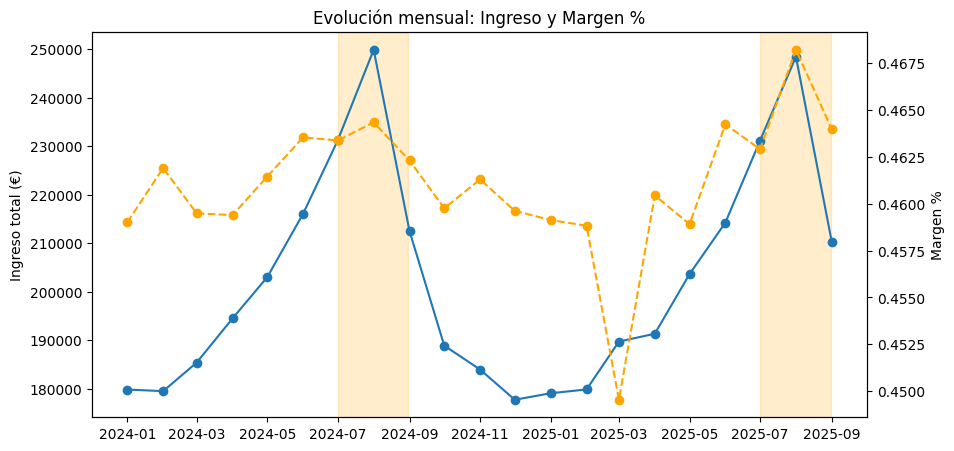

In [90]:
# plot: ingreso y margen pct (two axes)
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(monthly['date_month'], monthly['ingreso_total'], marker='o')
verano_periods = [('2024-07-01','2024-08-31'), ('2025-07-01','2025-08-31')]
for start, end in verano_periods:
    ax1.axvspan(start, end, color='orange', alpha=0.2)
ax1.set_ylabel('Ingreso total (€)')
ax2 = ax1.twinx()
ax2.plot(monthly['date_month'], monthly['margen_pct'], marker='o', linestyle='--', color='orange')
ax2.set_ylabel('Margen %')
ax1.set_title('Evolución mensual: Ingreso y Margen %')
plt.show()


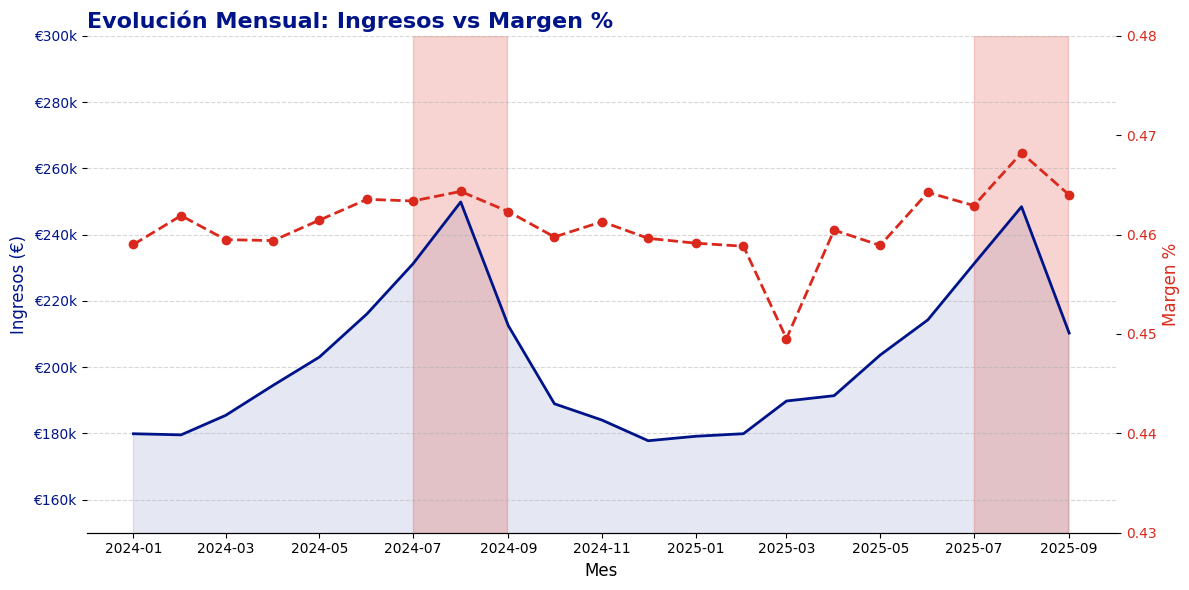

In [114]:
danone_blue = '#001489'
danone_red = '#DA291C'
def euro_k_formatter(x, pos):
    return f'€{x/1000:.0f}k'

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_ylim(150000, 300000)

ax1.set_xlabel('Mes', fontsize=12)
ax1.set_ylabel('Ingresos (€)', color=danone_blue, fontsize=12)
ax1.fill_between(monthly['date_month'], monthly['ingreso_total'], color=danone_blue, alpha=0.1) # Relleno suave
ax1.plot(monthly['date_month'], monthly['ingreso_total'], color=danone_blue, linewidth=2, label='Ingresos')
ax1.tick_params(axis='y', labelcolor=danone_blue)
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(euro_k_formatter))

ax2 = ax1.twinx() 
ax2.set_ylim(0.43, 0.48)
ax2.set_ylabel('Margen %', color=danone_red, fontsize=12)
ax2.plot(monthly['date_month'], monthly['margen_pct'], color=danone_red, linestyle='--', linewidth=2, marker='o', label='Margen %')
ax2.tick_params(axis='y', labelcolor=danone_red)

verano_periods = [('2024-07-01','2024-08-31'), ('2025-07-01','2025-08-31')]
for start, end in verano_periods:
    ax1.axvspan(start, end, color=danone_red, alpha=0.2)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.grid(True, axis='y', linestyle='--', alpha=0.5) # Rejilla suave solo horizontal

plt.title('Evolución Mensual: Ingresos vs Margen %', fontsize=16, fontweight='bold', color=danone_blue, loc='left')
plt.tight_layout()

# Guardar en alta resolución
plt.savefig('grafico_danone_bonito.png', dpi=300, transparent=True)
plt.show()

**Meses anómalos**: 

Vemos un pico fuerte de ingresos en julio y agosto cada año, coninciendo con los meses de verano. Agua embotellada y productos fríos como el yogur pueden subir en demanda. También deben haber campañas de verano. 

En marzo 2025, cae en picado el porcentaje de margen. Podría ser debido a un error de computo. En cambio, el porcentaje de margen crece en verano 2025. 

In [ ]:
mask = monthly['date_month'].dt.month.isin([2, 3, 4])
df_feb_mar_apr = df_sales[df_sales['date_month'].isin(pd.to_datetime(['2025-02-01','2025-03-01','2025-04-01']))]
price_cost_comparison = df_feb_mar_apr.groupby('date_month').agg(
    avg_price=('price_per_unit', 'mean'),
    avg_cost=('cost_per_unit', 'mean')
).reset_index()

print(price_cost_comparison)

  date_month  avg_price  avg_cost
0 2025-02-01   6.812167  3.655944
1 2025-03-01   6.774917  3.651667
2 2025-04-01   6.795722  3.638194


Con este código descartamos que la caída de marzo se deba a una baja de precios o subida de costes.

### **4. Modelado de datos**